In [4]:
import os
import pandas as pd
from pandas import ExcelWriter
import numpy as np
import pylab
import string
import sys
from scipy import stats,special 
import glob

import statsmodels.api as sm
from statsmodels.formula.api import ols,logit,mixedlm
from statsmodels.discrete.discrete_model import Logit
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.proportion import proportions_chisquare
import statsmodels.stats.power as smp

import matplotlib as mtl
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import rcParams

mtl.style.use('ggplot')
mtl.rcParams['pdf.fonttype'] = 42
mtl.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'sans-serif'
pylab.rcParams['figure.figsize'] = (10.0, 8.0)


#from rpy2.robjects.numpy2ri import ri2py

from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
idx=pd.IndexSlice

from numpy import array,log, zeros, sum, mean

# R
%load_ext rpy2.ipython
%R library(ez)
%R library(lme4)
#%R library(lmerTest)
%R library(lsmeans)
%R library(mutoss)
%R library(MASS)
%R lsm.options(disable.pbkrtest=TRUE) 
%R library(phia)
%matplotlib inline
%R library(sjPlot)
%R library(sjstats)
%R library(RCurl)
%R library(pbkrtest)


from IPython.display import clear_output
clear_output()

In [5]:
def det_diff_GameNum(x,nback=5):
    if nback == 5:
    
        if x.GameNum1bk!=x.GameNum5bk and x.GameNum1bk==x.GameNum4bk and x.GameNum1bk==x.GameNum3bk and x.GameNum1bk==x.GameNum2bk:
            o=5
        elif x.GameNum1bk!=x.GameNum5bk and x.GameNum1bk!=x.GameNum4bk and x.GameNum1bk==x.GameNum3bk and x.GameNum1bk==x.GameNum2bk:
            o=4
        elif x.GameNum1bk!=x.GameNum5bk and x.GameNum1bk!=x.GameNum4bk and x.GameNum1bk!=x.GameNum3bk and x.GameNum1bk==x.GameNum2bk:
            o=3
        elif x.GameNum1bk!=x.GameNum5bk and x.GameNum1bk!=x.GameNum4bk and x.GameNum1bk!=x.GameNum3bk and x.GameNum1bk!=x.GameNum2bk:
            o=2
        elif x.GameNum1bk==x.GameNum5bk and x.GameNum1bk==x.GameNum4bk and x.GameNum1bk==x.GameNum3bk and x.GameNum1bk==x.GameNum2bk:
            o=1
        else:
            o=np.nan
    
    elif nback == 10:
    
        if x.GameNum1bk==x.GameNum2bk and x.GameNum1bk==x.GameNum3bk and x.GameNum1bk==x.GameNum4bk and x.GameNum1bk==x.GameNum5bk and \
           x.GameNum1bk==x.GameNum6bk and x.GameNum1bk==x.GameNum7bk and x.GameNum1bk==x.GameNum8bk and x.GameNum1bk==x.GameNum9bk and x.GameNum1bk!=x.GameNum10bk:      
            o=10
        elif x.GameNum1bk==x.GameNum2bk and x.GameNum1bk==x.GameNum3bk and x.GameNum1bk==x.GameNum4bk and x.GameNum1bk==x.GameNum5bk and \
           x.GameNum1bk==x.GameNum6bk and x.GameNum1bk==x.GameNum7bk and x.GameNum1bk==x.GameNum8bk and x.GameNum1bk!=x.GameNum9bk and x.GameNum1bk!=x.GameNum10bk:      
            o=9
        elif x.GameNum1bk==x.GameNum2bk and x.GameNum1bk==x.GameNum3bk and x.GameNum1bk==x.GameNum4bk and x.GameNum1bk==x.GameNum5bk and \
           x.GameNum1bk==x.GameNum6bk and x.GameNum1bk==x.GameNum7bk and x.GameNum1bk!=x.GameNum8bk and x.GameNum1bk!=x.GameNum9bk and x.GameNum1bk!=x.GameNum10bk:      
            o=8
        elif x.GameNum1bk==x.GameNum2bk and x.GameNum1bk==x.GameNum3bk and x.GameNum1bk==x.GameNum4bk and x.GameNum1bk==x.GameNum5bk and \
           x.GameNum1bk==x.GameNum6bk and x.GameNum1bk!=x.GameNum7bk and x.GameNum1bk!=x.GameNum8bk and x.GameNum1bk!=x.GameNum9bk and x.GameNum1bk!=x.GameNum10bk:      
            o=7
        elif x.GameNum1bk==x.GameNum2bk and x.GameNum1bk==x.GameNum3bk and x.GameNum1bk==x.GameNum4bk and x.GameNum1bk==x.GameNum5bk and \
           x.GameNum1bk!=x.GameNum6bk and x.GameNum1bk!=x.GameNum7bk and x.GameNum1bk!=x.GameNum8bk and x.GameNum1bk!=x.GameNum9bk and x.GameNum1bk!=x.GameNum10bk:      
            o=6
        elif x.GameNum1bk==x.GameNum2bk and x.GameNum1bk==x.GameNum3bk and x.GameNum1bk==x.GameNum4bk and x.GameNum1bk!=x.GameNum5bk and \
           x.GameNum1bk!=x.GameNum6bk and x.GameNum1bk!=x.GameNum7bk and x.GameNum1bk!=x.GameNum8bk and x.GameNum1bk!=x.GameNum9bk and x.GameNum1bk!=x.GameNum10bk:      
            o=5
        elif x.GameNum1bk==x.GameNum2bk and x.GameNum1bk==x.GameNum3bk and x.GameNum1bk!=x.GameNum4bk and x.GameNum1bk!=x.GameNum5bk and \
           x.GameNum1bk!=x.GameNum6bk and x.GameNum1bk!=x.GameNum7bk and x.GameNum1bk!=x.GameNum8bk and x.GameNum1bk!=x.GameNum9bk and x.GameNum1bk!=x.GameNum10bk:      
            o=4
        elif x.GameNum1bk==x.GameNum2bk and x.GameNum1bk!=x.GameNum3bk and x.GameNum1bk!=x.GameNum4bk and x.GameNum1bk!=x.GameNum5bk and \
           x.GameNum1bk!=x.GameNum6bk and x.GameNum1bk!=x.GameNum7bk and x.GameNum1bk!=x.GameNum8bk and x.GameNum1bk!=x.GameNum9bk and x.GameNum1bk!=x.GameNum10bk:      
            o=3
        elif x.GameNum1bk!=x.GameNum2bk and x.GameNum1bk!=x.GameNum3bk and x.GameNum1bk!=x.GameNum4bk and x.GameNum1bk!=x.GameNum5bk and \
           x.GameNum1bk!=x.GameNum6bk and x.GameNum1bk!=x.GameNum7bk and x.GameNum1bk!=x.GameNum8bk and x.GameNum1bk!=x.GameNum9bk and x.GameNum1bk!=x.GameNum10bk:      
            o=2
        elif x.GameNum1bk==x.GameNum2bk and x.GameNum1bk==x.GameNum3bk and x.GameNum1bk==x.GameNum4bk and x.GameNum1bk==x.GameNum5bk and \
           x.GameNum1bk==x.GameNum6bk and x.GameNum1bk==x.GameNum7bk and x.GameNum1bk==x.GameNum8bk and x.GameNum1bk==x.GameNum9bk and x.GameNum1bk==x.GameNum10bk:      
            o=1
        else:
            o=np.nan
    
    return(o)



def set_diff_GameNum_to_nan(x1,exclcond,exclcond_type='df',nback=5):
    x=x1.copy(deep=True)
    
    if exclcond_type=='df':
        exc = exclcond.ix[x.name]
    elif exclcond_type=='num':
        exc = exclcond            
    
    if nback == 5:
        if exc==5:
            x.loc[x.filter(regex='5').index]=np.nan
        elif exc==4:
            x.loc[x.filter(regex='5').index]=np.nan
            x.loc[x.filter(regex='4').index]=np.nan
        elif exc==3:
            x.loc[x.filter(regex='5').index]=np.nan
            x.loc[x.filter(regex='4').index]=np.nan
            x.loc[x.filter(regex='3').index]=np.nan
        elif exc==2:
            x.loc[x.filter(regex='5').index]=np.nan
            x.loc[x.filter(regex='4').index]=np.nan
            x.loc[x.filter(regex='3').index]=np.nan
            x.loc[x.filter(regex='2').index]=np.nan
        elif exc==1:
            pass
        
    if nback == 10:
        if exc==10:
            x.loc[x.filter(regex='10').index]=np.nan
        elif exc==9:
            x.loc[x.filter(regex='10').index]=np.nan
            x.loc[x.filter(regex='9').index]=np.nan
        elif exc==8:
            x.loc[x.filter(regex='10').index]=np.nan
            x.loc[x.filter(regex='9').index]=np.nan
            x.loc[x.filter(regex='8').index]=np.nan
        elif exc==7:
            x.loc[x.filter(regex='10').index]=np.nan
            x.loc[x.filter(regex='9').index]=np.nan
            x.loc[x.filter(regex='8').index]=np.nan
            x.loc[x.filter(regex='7').index]=np.nan
        elif exc==6:
            x.loc[x.filter(regex='10').index]=np.nan
            x.loc[x.filter(regex='9').index]=np.nan
            x.loc[x.filter(regex='8').index]=np.nan
            x.loc[x.filter(regex='7').index]=np.nan
            x.loc[x.filter(regex='6').index]=np.nan
        elif exc==5:
            x.loc[x.filter(regex='10').index]=np.nan
            x.loc[x.filter(regex='9').index]=np.nan
            x.loc[x.filter(regex='8').index]=np.nan
            x.loc[x.filter(regex='7').index]=np.nan
            x.loc[x.filter(regex='6').index]=np.nan
            x.loc[x.filter(regex='5').index]=np.nan
        elif exc==4:
            x.loc[x.filter(regex='10').index]=np.nan
            x.loc[x.filter(regex='9').index]=np.nan
            x.loc[x.filter(regex='8').index]=np.nan
            x.loc[x.filter(regex='7').index]=np.nan
            x.loc[x.filter(regex='6').index]=np.nan
            x.loc[x.filter(regex='5').index]=np.nan
            x.loc[x.filter(regex='4').index]=np.nan
        elif exc==3:
            x.loc[x.filter(regex='10').index]=np.nan
            x.loc[x.filter(regex='9').index]=np.nan
            x.loc[x.filter(regex='8').index]=np.nan
            x.loc[x.filter(regex='7').index]=np.nan
            x.loc[x.filter(regex='6').index]=np.nan
            x.loc[x.filter(regex='5').index]=np.nan
            x.loc[x.filter(regex='4').index]=np.nan
            x.loc[x.filter(regex='3').index]=np.nan
        elif exc==2:
            x.loc[x.filter(regex='10').index]=np.nan
            x.loc[x.filter(regex='9').index]=np.nan
            x.loc[x.filter(regex='8').index]=np.nan
            x.loc[x.filter(regex='7').index]=np.nan
            x.loc[x.filter(regex='6').index]=np.nan
            x.loc[x.filter(regex='5').index]=np.nan
            x.loc[x.filter(regex='4').index]=np.nan
            x.loc[x.filter(regex='3').index]=np.nan
            x.loc[x.filter(regex='9').index]=np.nan
            x.loc[x.filter(regex='2').index]=np.nan
        elif exc==1:
            pass
    return(x)


def det_accuracy(x,autochoice='nan'):
    if x.autochoice_oz==1:
        if autochoice=='nan':
            autochoice_corr=np.nan
        elif autochoice=='incorr':
            autochoice_corr=0
        elif autochoice=='resp':
            if (x.ProbL==90 or x.ProbL==60) and x.autochoice==1:
                autochoice_corr=1
            elif (x.ProbR==90 or x.ProbR==60) and x.autochoice==2:
                autochoice_corr=1
            elif (x.ProbL==90 or x.ProbL==60) and x.autochoice==2:
                autochoice_corr=0
            elif (x.ProbR==90 or x.ProbR==60) and x.autochoice==1:
                autochoice_corr=0
    
    if x.resp==3:
        corr=np.nan
    elif (x.ProbL==90 or x.ProbL==60) and x.resp==1:
        corr=1
    elif (x.ProbR==90 or x.ProbR==60) and x.resp==2:
        corr=1
    elif (x.ProbL==90 or x.ProbL==60) and x.resp==2:
        corr=0
    elif (x.ProbR==90 or x.ProbR==60) and x.resp==1:
        corr=0
    elif x.autochoice_oz==1:
        corr=autochoice_corr
    else:
        corr=3
    return(corr)

In [6]:
def get_bin_width(df,binwidth,index=False):
    import numpy as np
    if index == False:
    	bin_width = np.arange(np.min(df), np.max(df) + binwidth, binwidth)
    else:
    	bin_width = np.arange(np.min(df.ix[index]), np.max(df.ix[index]) + binwidth, binwidth)
    return(bin_width)

In [7]:
def mfit_optimize_no_priors(likfun,param,data,nstarts = 5):
    
    # Find maximum a posteriori parameter estimates.
    #
    # USAGE: results = mfit_optimize(likfun,param,data,[nstarts])
    #
    # INPUTS:
    #   likfun - likelihood function handle
    #   param - [K x 1] parameter structure
    #   data - [S x 1] data structure
    #   nstarts (optional) - number of random starts (default: 5)
    #
    # OUTPUTS:
    #   results - structure with the following fields:
    #               .x - [S x K] parameter estimates
    #               .logpost - [S x 1] log posterior
    #               .bic - [S x 1] Bayesian information criterion
    #               .aic - [S x 1] Akaike information criterion
    #               .H - [S x 1] cell array of Hessian matrices
    #
    # Sam Gershman, June 2015
    from scipy.optimize import minimize
    from numpy import log, zeros
    from numpy.random import uniform
    #from RLfun_modV2 import rllik,rlRW,rlRW_lapse_rate,rlRW_lapse_rate_q0,rlRW_lapse_rate_bias,rlRW_lapse_rate_bias_rew_pun,rlRW_lapse_bias_Pav
    
    S = len(data)
    K = len(param)
    results = {'K':K}

    results['param'] = param
    results['likfun'] = likfun

    bounds = []
    for i in range(K):
        bounds.append((param[i]['lb'],param[i]['ub']))
    bounds = tuple(bounds)
    
    results['logpost'] = zeros((S,nstarts))
    results['x'] = zeros((S,K))
    #results['H'] = zeros((S,K*K))
    results['bic'] = zeros((S,nstarts))
    results['aic'] = zeros((S,nstarts))
    results['winner'] = zeros(S)

    for s in range(S):
        print('Subject %d'%s)
        
        # construct posterior function
        f = lambda x: -likfun(x,data[s])
        for i in range(nstarts):
            x0 = zeros(K)
            for k in range(K):
                x0[k]= uniform(param[k]['lb'],param[k]['ub'])
                if i==2:
                    x0=array([4,.1,.001,5,.01])
            opt_min_result = minimize(f,x0,hess=None,bounds=bounds)
            x = opt_min_result.x
            logp = -opt_min_result.fun
    
            results['logpost'][s][i] = logp
            if i == 0 or results['logpost'][s][i-1] < logp or results['logpost'][s][i-2] < logp:
                
                results['x'][s] = x
                results['winner'][s]=i

            results['bic'][s][i] = K*log(data[s]['N']) - 2*results['logpost'][s][i]
            results['aic'][s][i] = K*2 - 2*results['logpost'][s][i]

    return(results)

In [15]:
#File path- in setwd() in R
pth='/Volumes/GoogleDrive/My Drive/Work/Projects/CurrentProjects/Escape/Escape_Task_Sui/raw_data'
os.chdir(pth)

In [16]:
#Lists all the files with xlsx in a directory
files = glob.glob(r"*.xlsx")

In [17]:
dlist=[]
for f in files:
        try:
            dtmp=pd.read_excel(f,sheet_name='trials')
        except:
            continue
        dtmp['subn']=int(f[11:14])
        dtmp = dtmp.rename(columns=lambda x: x.replace('.', '_'))
        dropidx=dtmp[(dtmp.ProbL=='extraInfo')|(dtmp.ProbL=='date')|(dtmp.ProbL=='frameRate')|(dtmp.ProbL=='expName')|(dtmp.ProbL=='participant')|(dtmp.ProbL.isnull())].index
        dtmp=dtmp.drop(dropidx)

        dlist.append(dtmp)

In [18]:
#make list of DFs into one big DF
d=pd.concat(dlist)

/Users/alexmillner/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [19]:
#Only retain rows where outcome_msg_raw does NOT equal "'--'"
d=d[d.outcome_msg_raw!="'--'"]

In [20]:
d.drop(d.filter(like='Unnamed').columns,axis=1,inplace=True)

In [21]:
d.columns

Index(['AvgProb', 'Cond', 'CueResp_keys_raw', 'FdbkSkipTime_mean',
       'FdbkSkipTime_raw', 'FdbkSkipTime_std', 'FeedbackTime_mean',
       'FeedbackTime_raw', 'FeedbackTime_std', 'GameNum', 'ITI_resp_keys_raw',
       'ITI_resp_rt_mean', 'ITI_resp_rt_raw', 'ITI_resp_rt_std', 'ProbL',
       'ProbR', 'Randomize', 'RespResultL', 'RespResultR',
       'TargetResp_keys_raw', 'TargetResp_rt_mean', 'TargetResp_rt_raw',
       'TargetResp_rt_std', 'TrialListVersion', 'TrialNum', 'autochoice_mean',
       'autochoice_raw', 'autochoice_std', 'block_trialnum_mean',
       'block_trialnum_raw', 'block_trialnum_std', 'choice_pic_raw',
       'choice_prob_raw', 'count_down_trials_mean', 'count_down_trials_raw',
       'count_down_trials_std', 'endgame_sound_term_time_dynamic_mean',
       'endgame_sound_term_time_dynamic_raw',
       'endgame_sound_term_time_dynamic_std', 'extra_resp_keys_raw',
       'extra_resp_rt_raw', 'feedbacksound1_raw', 'feedbacksound2_raw', 'n',
       'next_trial_mean',

In [22]:
d=d.rename(columns={'CueResp_keys_raw':'CueResp','Cond':'cond',\
                        'ITI_resp_keys_raw':'ITIresp','TargetResp_keys_raw':'Targetresp',\
                        'TargetResp_rt_raw':'TargetRT','sound_outcome_raw':'fdbk_soundOn',\
                        'autochoice_raw':'autochoice','block_trialnum_raw':'block_trialnum',\
                        'choice_prob_raw':'choice_prob','count_down_trials_raw':'count_down_trials'\
                        ,'next_trial_raw':'next_trial','autochoice_raw':'autochoice'})

In [23]:
d['resp']=np.nan
d.loc[d['Targetresp']=="'z'",'resp']=1
d.loc[d['Targetresp']=="'m'",'resp']=2
d.loc[(d['Targetresp']=="'y'")\
      |(d['Targetresp']=="'x'")\
      |(d['Targetresp']=="'n'")\
      |(d['Targetresp']=="'space'"),'resp']=3

In [24]:
#Left=1, Right=2, Escape=3
d['selected_cue']=np.nan
d.loc[(d['Targetresp']=="'z'")&((d.ProbL==60)|(d.ProbL==90)),'selected_cue']=0
d.loc[(d['Targetresp']=="'m'")&((d.ProbR==60)|(d.ProbR==90)),'selected_cue']=0
d.loc[(d['Targetresp']=="'z'")&((d.ProbL==40)|(d.ProbL==10)),'selected_cue']=1
d.loc[(d['Targetresp']=="'m'")&((d.ProbR==40)|(d.ProbR==10)),'selected_cue']=1
d.loc[(d['Targetresp']=="'y'")\
      |(d['Targetresp']=="'x'")\
      |(d['Targetresp']=="'n'")\
      |(d['Targetresp']=="'space'"),'selected_cue']=2

In [25]:
d.loc[d.autochoice.str.contains('0.')==True,'autochoice']=0
#Switch so left = 1 and right = 2 as in resp
d.autochoice.replace({'[1]':2,'[2]':1},inplace=True)

In [26]:
d['autochoice_selected_cue']=np.nan
d.loc[(d.autochoice==1)&((d.ProbL==60)|(d.ProbL==90)),'autochoice_selected_cue']=0
d.loc[(d.autochoice==2)&((d.ProbR==60)|(d.ProbR==90)),'autochoice_selected_cue']=0
d.loc[(d.autochoice==1)&((d.ProbL==40)|(d.ProbL==10)),'autochoice_selected_cue']=1
d.loc[(d.autochoice==2)&((d.ProbR==40)|(d.ProbR==10)),'autochoice_selected_cue']=1

In [27]:
d.loc[(d.autochoice!=0)&(d.resp==3),'autochoice_oz']=0
d.loc[(d.autochoice!=0)&(d.resp!=3),'autochoice_oz']=1

In [28]:
d=d.reset_index(drop=True)
d.fdbk_soundOn.replace({" '--'":np.nan},inplace=True)
d['fdbk_soundOn']=pd.to_numeric(d.fdbk_soundOn)
#1=sound off,0=oundon
d['fdbk_soundOff']=d['fdbk_soundOn'].replace({0:2,1:0})
d['fdbk_soundOff']=d['fdbk_soundOff'].replace({2:1})


In [29]:
#Auto choices entered as nan
d['correct_autonan']=d.apply(lambda x:det_accuracy(x),axis=1)
#Auto choices entered as wrong no matter what
d['correct_autowrong']=d.apply(lambda x:det_accuracy(x,'incorr'),axis=1)
#Autochoices entered as if response was entered
d['correct_autoresp']=d.apply(lambda x:det_accuracy(x,'resp'),axis=1)

In [30]:
d.loc[d.resp==3,'cond']=d.shift(1).loc[d.resp==3,'cond']

In [31]:
d['switch']=0
d.loc[d.resp==3,'switch']=1

In [32]:
GameNumMatch=d.GameNum!=d.shift(1).GameNum
GameNumMatch.loc[0]=False

In [33]:
d['NewGame']=0
d.loc[GameNumMatch,'NewGame']=1

In [34]:
d.next_trial.replace({" '--'":np.nan},inplace=True)
d.next_trial=pd.to_numeric(d.next_trial)

In [35]:
d['trnum']=d.next_trial+1

In [36]:
gmtrn=pd.DataFrame(np.repeat(np.nan,d.shape[0]),columns=['gmtrn'])
for i in range(d.shape[0]):
    if i==0:
        gmtrn.loc[i]=1
    elif (d.subn.loc[i]!=d.subn.loc[i-1]) or (d.loc[i-1,'switch']==1) or (d.loc[i-1,'trnum']==30):
        gmtrn.loc[i]=1
    else:
        gmtrn.loc[i]=gmtrn.loc[i-1]+1

In [37]:
d=pd.concat([d,gmtrn],axis=1)

In [38]:
d.loc[d.switch==1,['trnum','correct_autonan','correct_autowrong','correct_autoresp','fdbk_soundOff','fdbk_soundOn',\
                              'autochoice_oz','autochoice','ProbR','ProbL']]=np.nan

In [39]:
#Fill in Nan b/c of autochoice with choice autochoice made
d.selected_cue=d.selected_cue.fillna(d.autochoice_selected_cue)

In [40]:
d.correct_autonan.mean()

0.8166550410473788

In [41]:
accry=d.groupby('subn').correct_autonan.mean()
accry.mean()*100

81.68110866903224

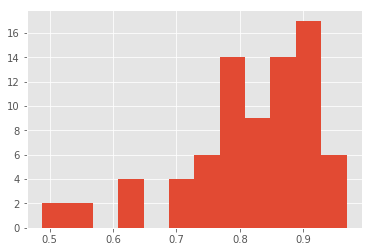

In [42]:
bins=get_bin_width(accry,.04)
accry.hist(bins=bins)
plt.show()

In [43]:
d.cond.replace({'high':'easy','low':'diff'},inplace=True)

In [44]:
d.groupby(['subn','cond','selected_cue']).subn.count()

subn  cond  selected_cue
1     diff  0.0              88
            1.0              23
            2.0               4
      easy  0.0             126
            1.0               8
2     diff  0.0              76
            1.0              52
            2.0               3
      easy  0.0              96
            1.0              21
            2.0               1
3     diff  0.0             115
            1.0              35
      easy  0.0              92
            1.0               5
4     diff  0.0              75
            1.0              34
            2.0               1
      easy  0.0             125
            1.0              12
            2.0               1
5     diff  0.0              56
            1.0              16
            2.0               5
      easy  0.0             166
            1.0               7
6     diff  0.0              35
            1.0              40
            2.0               7
      easy  0.0             144
               

In [45]:
total_exits=d[d.resp==3].shape[0]
print('        %s'%total_exits)

        535


In [46]:
#Switch x sub
swxsub=pd.concat([d[d.resp==3].groupby('subn').subn.count(),num_exit],axis=1)

NameError: name 'num_exit' is not defined

In [47]:
swxcond=pd.DataFrame([d[(d.resp==3) & (d.shift(1).cond=='easy')].shape[0],\
              d[(d.resp==3) & (d.shift(1).cond=='diff')].shape[0]],columns=['NumExits'],\
                     index=['Easy (90-10 contingencies)','Difficult (60-40 contingencies)'])

In [48]:
swxcond

,NumExits
Easy (90-10 contingencies),122
Difficult (60-40 contingencies),413


In [49]:
switches = d.groupby(['subn','cond','resp']).resp.sum()

In [50]:
switches.name='resp_sum'

In [52]:
os.chdir('/Volumes/GoogleDrive/My Drive/Work/Projects/CurrentProjects/Escape/Escape_Task_Sui/')

In [53]:
grps=pd.read_excel('Groups.xlsx',sheet_name='Sheet1')

In [54]:
grps=grps[grps.Group!='DROP']

In [55]:
switches=switches.reset_index()

In [56]:
swtch=switches.merge(grps,on='subn',how='inner')

In [57]:
swtch.loc[swtch.Group=='CN','grp_sui_nosui']='2nosui'
swtch.loc[(swtch.Group=='AT')|(swtch.Group=='ID'),'grp_sui_nosui']='1sui'

In [58]:
swtch.head()

,subn,cond,resp,resp_sum,Group,grp_sui_nosui
0,1,diff,1.0,57.0,ID,1sui
1,1,diff,2.0,104.0,ID,1sui
2,1,diff,3.0,12.0,ID,1sui
3,1,easy,1.0,63.0,ID,1sui
4,1,easy,2.0,142.0,ID,1sui


In [59]:
swtch=swtch[swtch.resp==3]

In [60]:
swtch=swtch[swtch.resp_sum<40]

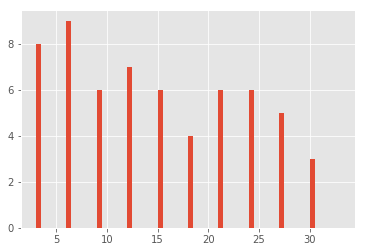

In [61]:

swtch[swtch.Group=='ID'].resp_sum.hist(bins=get_bin_width(swtch[swtch.Group=='CN'].resp_sum,.5))

cond,diff,easy
Group,,
AT,15.600000,10.333333
CN,13.071429,8.571429
ID,18.631579,7.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1fada390>,
      dtype=object)

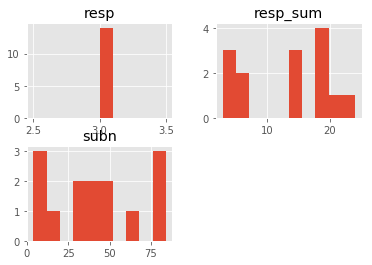

In [91]:
swtch[(swtch.Group=='CN')&(swtch.cond=='diff')].hist()

In [96]:
swtch[(swtch.Group=='CN')&(swtch.cond=='easy')]

,subn,cond,resp,resp_sum,Group,grp_sui_nosui
20,4,easy,3.0,3.0,CN,2nosui
63,13,easy,3.0,3.0,CN,2nosui
173,38,easy,3.0,3.0,CN,2nosui
187,42,easy,3.0,9.0,CN,2nosui
204,45,easy,3.0,3.0,CN,2nosui
361,75,easy,3.0,33.0,CN,2nosui
410,84,easy,3.0,6.0,CN,2nosui


In [97]:
swtch=swtch.drop(361)

In [107]:
swtch.Group=swtch.Group.replace({'AT':'1AT','ID':'2ID','CN':'3CN'})
swtch['Group10']=swtch.Group.replace({'1AT':1,'2ID':2,'3CN':3})

In [102]:
swtch[(swtch.Group=='1AT')&(swtch.cond=='easy')]

,subn,cond,resp,resp_sum,Group,grp_sui_nosui
69,14,easy,3.0,9.0,1AT,1sui
75,15,easy,3.0,3.0,1AT,1sui
109,22,easy,3.0,6.0,1AT,1sui
198,44,easy,3.0,12.0,1AT,1sui
273,59,easy,3.0,3.0,1AT,1sui
327,69,easy,3.0,15.0,1AT,1sui
333,70,easy,3.0,27.0,1AT,1sui
388,80,easy,3.0,3.0,1AT,1sui
404,83,easy,3.0,15.0,1AT,1sui


In [103]:
swtch=swtch.drop(333)

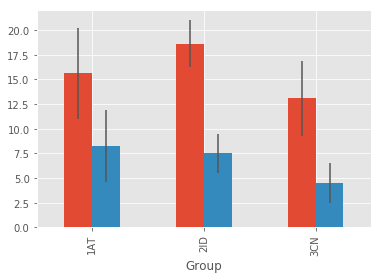

In [120]:
ci=swtch.groupby(['Group','cond']).resp_sum.sem().unstack()*1.96
swtch.groupby(['Group','cond']).resp_sum.mean().unstack().plot(kind='bar',yerr=ci,legend=False)
plt.savefig('escape.pdf')

In [105]:
%R library(Rfast)

R[write to console]: Loading required package: Rcpp

R[write to console]: Loading required package: RcppZiggurat



array(['Rfast', 'RcppZiggurat', 'Rcpp', 'MASS', 'lme4', 'Matrix', 'tools',
       'stats', 'graphics', 'grDevices', 'utils', 'datasets', 'methods',
       'base'], dtype='<U12')

In [115]:
swtchdiff=swtch[swtch.cond=='diff'].copy(deep=True)
swtcheasy=swtch[swtch.cond=='easy'].copy(deep=True)

In [116]:
%R -i swtch
%R -i swtchdiff
%R -i swtcheasy

In [117]:
%R swtchdiff$Group10

array([2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 3, 3, 2, 3, 3, 2, 1, 3, 2, 1, 3, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 3, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 1, 3,
       1], dtype=int32)

In [112]:
%R pout=poisson.anova(swtch$resp_sum, swtch$Group10, logged = FALSE)

array([1.95442422e+01, 5.70192813e-05])

In [118]:
%R pout=poisson.anova(swtchdiff$resp_sum, swtch$Group10, logged = FALSE)

array([1.66924591e+01, 2.37289517e-04])

In [119]:
%R pout=poisson.anova(swtcheasy$resp_sum, swtch$Group10, logged = FALSE)

array([1.69736147, 0.42797918])

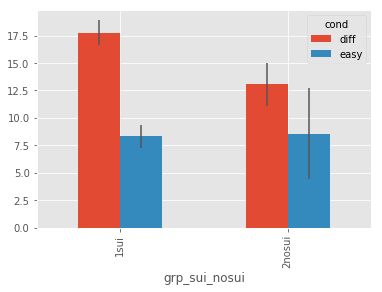

In [95]:
ci=swtch.groupby(['grp_sui_nosui','cond']).resp_sum.sem().unstack()
swtch.groupby(['grp_sui_nosui','cond']).resp_sum.mean().unstack().plot(kind='bar',yerr=ci)

In [82]:
stats.ttest_ind(switches[switches.Group=='DCN'].resp.dropna(),switches[(switches.Group=='ID')|(switches.Group=='AT')].resp.dropna())

Ttest_indResult(statistic=0.84846386833333032, pvalue=0.39960897489579073)